All 30 feature names:
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

First 5 rows
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       11.430         15.39           73.06      399.8          0.09639   
1       11.280         13.39           73.00      384.8          0.11640   
2        9.738         11.97           61.24      288.5          0.09250   

NameError: name 'feature_i' is not defined

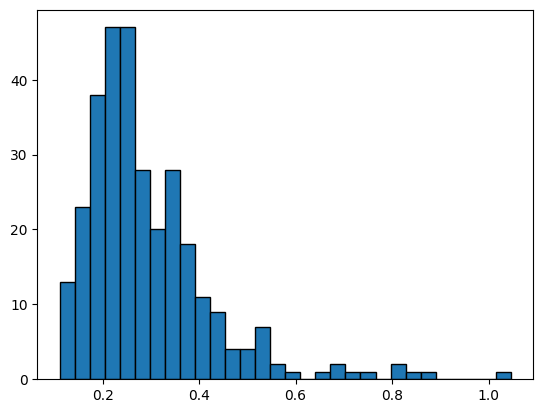

In [71]:
# Step A
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("patients.csv")  # Load file as pandas DataFrame

# Display the names of the 30 features
feature_names = df.columns
print("All 30 feature names:")
print(feature_names)

# Display first 5 rows
print("\nFirst 5 rows")
print(df.head())

# Print basic stats
print("\nBasic statistics")
print(df.describe())

#histogram
feature_index = 10  # Change this to choose a different feature
plt.hist(df.iloc[:, feature_index], bins=30, edgecolor='black')
plt.xlabel(f'Values of {feature_names[feature_i]}')
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature_names[feature_i]}')
plt.show()

In [72]:
# Step B - part 1
from sklearn.preprocessing import StandardScaler
X = df.values  # Get the values as a numpy array.
scaler = StandardScaler()
X_normalised = scaler.fit_transform(X) # scale and centre the data ensure that each feature has a mean of 0 and a standard deviation of 1

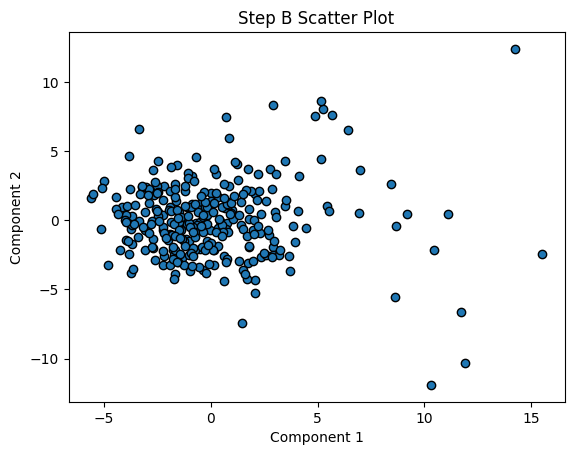

In [73]:
# Step B - part 2
from sklearn.decomposition import PCA
# apply pca to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalised)
# Create the scatter plot using the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', edgecolor='black')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Step B Scatter Plot')
plt.show()

In [74]:
# Step C
def euclidean_distance(point1, point2):
    point1 = np.array(point1) # make sure the input points are numpy arrays
    point2 = np.array(point2)
    distance = np.linalg.norm(point1 - point2) #calculate euclidean distance efficiently
    return distance

In [75]:
# Step D
def calculate_anomaly_score(data,query_point,k):
    # Calculate the Euclidean distances between the query point and all other data points in the dataset
    distances = []
    for data_point in data: # for each point in the data
        distance = euclidean_distance(query_point, data_point) # compute distance
        distances.append(distance) # then add it to list
    
    # Select the k smallest distances as potential neighbors
    sorted_distances = sorted(distances)[:k] # Sort distances and select the fist k elements from the sorted list using slicing
    
    # Compute a single anomaly score for the query_point based on these k distances
    anomaly_score = np.mean(sorted_distances) # find average
    
    return anomaly_score

In [76]:
#Step E
anomaly_scores = []  # empty list to store anomaly scores for each patient

# calculate anomaly scores for each patient in the dataset
for i in range(len(X_normalised)):
    query_point = X_normalised[i]
    k = 5  # number of nearest neighbours to consider
    score = calculate_anomaly_score(X_normalised, query_point, k)
    anomaly_scores.append((i, score))  # Store the index and anomaly score

# sort the anomaly scores in ascending order based on the score
sorted_anomaly_scores = sorted(anomaly_scores, key=lambda x: x[1]) # sort using the second element only; the scores only

n = 10  # number of top anomalies to be checked

# get the top n anomalous patients based on their anomaly scores
top_n_anomalies = sorted_anomaly_scores[:n] # Sort scores and select the fist n elements from the sorted list using slicing

# print the index and anomaly scores of the top n patients
print(f"The Top {n} Anomalous Patients are:")
for i, score in top_n_anomalies:
    print(f"Patient {i} with Anomaly Score of {score}")

The Top 10 Anomalous Patients are:
Patient 44 with Anomaly Score of 1.3823092223776006
Patient 17 with Anomaly Score of 1.4361517928079301
Patient 211 with Anomaly Score of 1.445506356968375
Patient 116 with Anomaly Score of 1.457991512319103
Patient 38 with Anomaly Score of 1.475956879290674
Patient 75 with Anomaly Score of 1.481845766161003
Patient 256 with Anomaly Score of 1.4845402181065204
Patient 9 with Anomaly Score of 1.5049579032890459
Patient 15 with Anomaly Score of 1.5053138630656284
Patient 247 with Anomaly Score of 1.5114242961029887


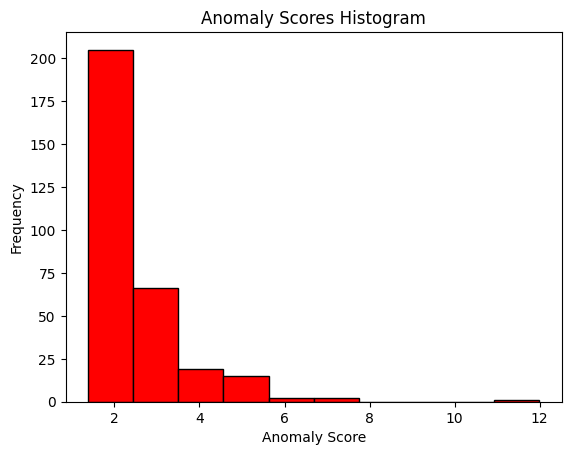

In [77]:
# Step F - part 1
anomaly_scores_only = [] # get the scores only, as the previous list uses a tuple
for i, score in sorted_anomaly_scores:
    anomaly_scores_only.append(score)
plt.hist(anomaly_scores_only, edgecolor='black', color='red')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Scores Histogram')
plt.show()

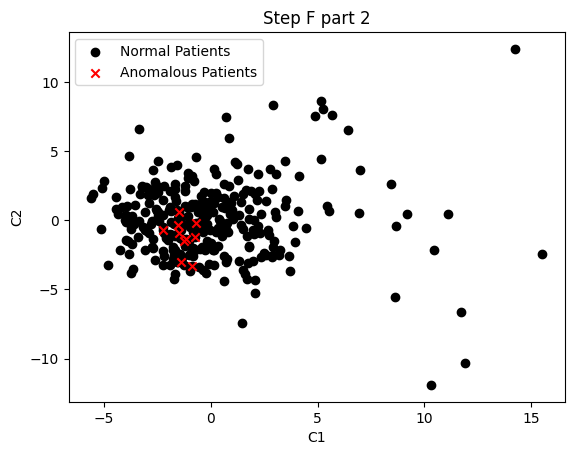

In [78]:
# Step F - part 2
anomalous_indices = []
for i, j in top_n_anomalies: # get the indices of the top n anomalous patients
    anomalous_indices.append(i)

plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', color='black', label='Normal Patients') # scatter plot of the PCA data
# marking the anomalous data-points in a distinct color or shape
plt.scatter(X_pca[anomalous_indices, 0], X_pca[anomalous_indices, 1], marker='x', color='red', label='Anomalous Patients')
plt.xlabel('C1')
plt.ylabel('C2')
plt.title('Step F part 2')
plt.legend()
plt.show()

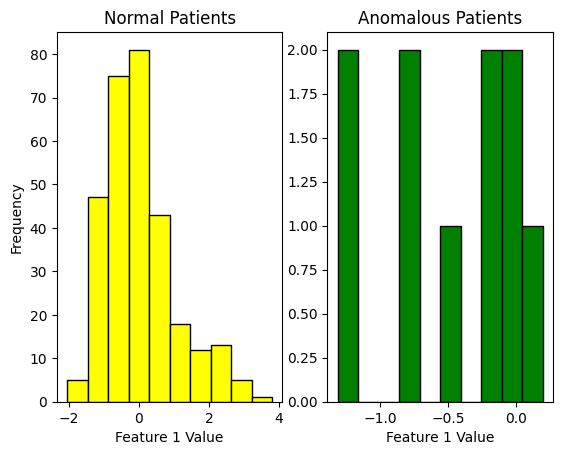

In [83]:
# Step F - part 3
featureID = 1
normal_feature_values = [] # initialise arrays
anomalous_feature_values = []

for i in range(len(X_normalised)): # get the feature values for normal and abnormal patents
    feature_value = X_normalised[i, featureID]
    if i not in anomalous_indices:
        normal_feature_values.append(feature_value)
    else:
        anomalous_feature_values.append(feature_value)

normal_feature_values = np.array(normal_feature_values) # convert to np arrays
anomalous_feature_values = np.array(anomalous_feature_values)

# using sub plots to compare
plt.subplot(1, 2, 1)
plt.hist(normal_feature_values, edgecolor='black', color='yellow')
plt.xlabel(f'Feature {featureID} Value')
plt.ylabel('Frequency')
plt.title('Normal Patients')

plt.subplot(1, 2, 2)
plt.hist(anomalous_feature_values, edgecolor='black', color='green')
plt.xlabel(f'Feature {featureID} Value')
plt.title('Anomalous Patients')

plt.show()